# Loading the Data and other imports

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df=pd.read_csv('lending_club_loan_two.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

#  Exploratory Data Analysis

Get an understanding for which variables are important, view summary statistics, and visualize the data

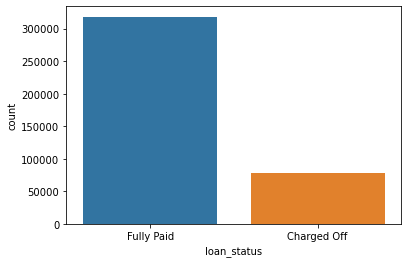

In [10]:
sns.countplot(x='loan_status',data=df)

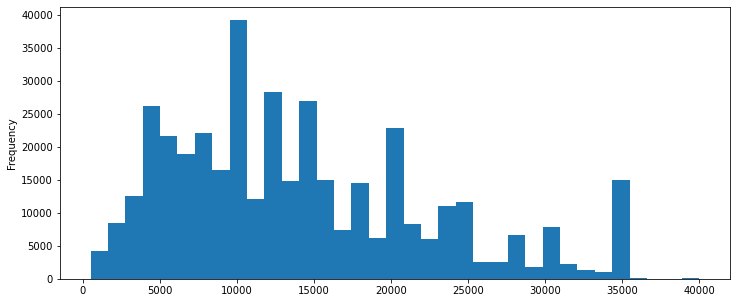

In [11]:
plt.figure(figsize=(12,5))
df['loan_amnt'].plot(kind='hist',bins=35)

In [12]:
df.corr()

loan_amnt  int_rate  installment  annual_inc       dti  \
loan_amnt              1.000000  0.168921     0.953929    0.336887  0.016636   
int_rate               0.168921  1.000000     0.162758   -0.056771  0.079038   
installment            0.953929  0.162758     1.000000    0.330381  0.015786   
annual_inc             0.336887 -0.056771     0.330381    1.000000 -0.081685   
dti                    0.016636  0.079038     0.015786   -0.081685  1.000000   
open_acc               0.198556  0.011649     0.188973    0.136150  0.136181   
pub_rec               -0.077779  0.060986    -0.067892   -0.013720 -0.017639   
revol_bal              0.328320 -0.011280     0.316455    0.299773  0.063571   
revol_util             0.099911  0.293659     0.123915    0.027871  0.088375   
total_acc              0.223886 -0.036404     0.202430    0.193023  0.102128   
mort_acc               0.222315 -0.082583     0.193694    0.236320 -0.025439   
pub_rec_bankruptcies  -0.106539  0.057450    -0.098628   -0.050162 -0.014558   

                      open_acc   pub_rec  revol_bal  revol_util  total_acc  \
loan_amnt             0.198556 -0.077779   0.328320    0.099911   0.223886   
int_rate              0.011649  0.060986  -0.011280    0.293659  -0.036404   
installment           0.188973 -0.067892   0.316455    0.123915   0.202430   
annual_inc            0.136150 -0.013720   0.299773    0.027871   0.193023   
dti                   0.136181 -0.017639   0.063571    0.088375   0.102128   
open_acc              1.000000 -0.018392   0.221192   -0.131420   0.680728   
pub_rec              -0.018392  1.000000  -0.101664   -0.075910   0.019723   
revol_bal             0.221192 -0.101664   1.000000    0.226346   0.191616   
revol_util           -0.131420 -0.075910   0.226346    1.000000  -0.104273   
total_acc             0.680728  0.019723   0.191616   -0.104273   1.000000   
mort_acc              0.109205  0.011552   0.194925    0.007514   0.381072   
pub_rec_bankruptcies -0.027732  0.699408  -0.124532   -0.086751   0.042035   

                      mort_acc  pub_rec_bankruptcies  
loan_amnt             0.222315             -0.106539  
int_rate             -0.082583              0.057450  
installment           0.193694             -0.098628  
annual_inc            0.236320             -0.050162  
dti                  -0.025439             -0.014558  
open_acc              0.109205             -0.027732  
pub_rec               0.011552              0.699408  
revol_bal             0.194925             -0.124532  
revol_util            0.007514             -0.086751  
total_acc             0.381072              0.042035  
mort_acc              1.000000              0.027239  
pub_rec_bankruptcies  0.027239              1.000000

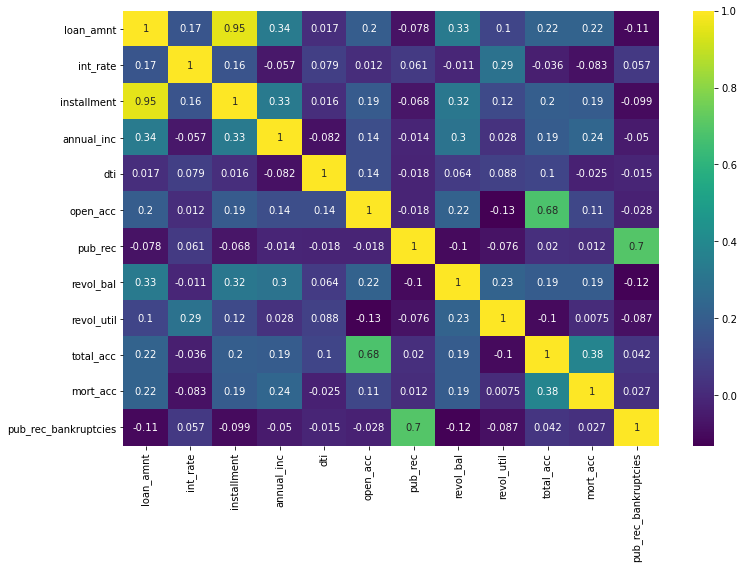

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

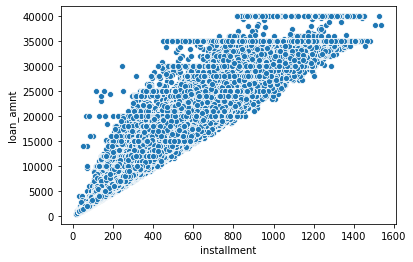

In [14]:
sns.scatterplot(x='installment',y='loan_amnt',data=df)

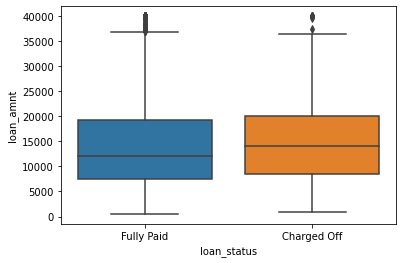

In [15]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [16]:
df.groupby('loan_status')['loan_amnt'].describe()

count          mean          std     min     25%      50%  \
loan_status                                                                 
Charged Off   77673.0  15126.300967  8505.090557  1000.0  8525.0  14000.0   
Fully Paid   318357.0  13866.878771  8302.319699   500.0  7500.0  12000.0   

                 75%      max  
loan_status                    
Charged Off  20000.0  40000.0  
Fully Paid   19225.0  40000.0

In [17]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [18]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

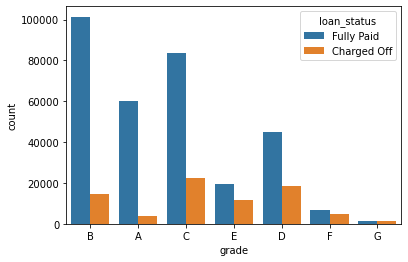

In [19]:
sns.countplot(x='grade',data=df,hue='loan_status')

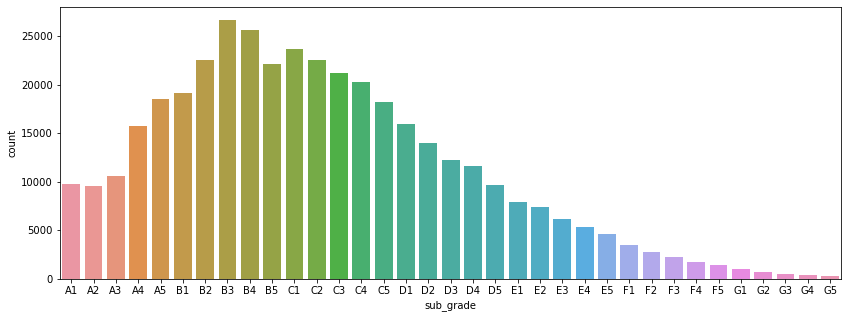

In [20]:
plt.figure(figsize=(14,5))
sns.countplot(x='sub_grade',data=df,order=sorted(df['sub_grade'].unique()))

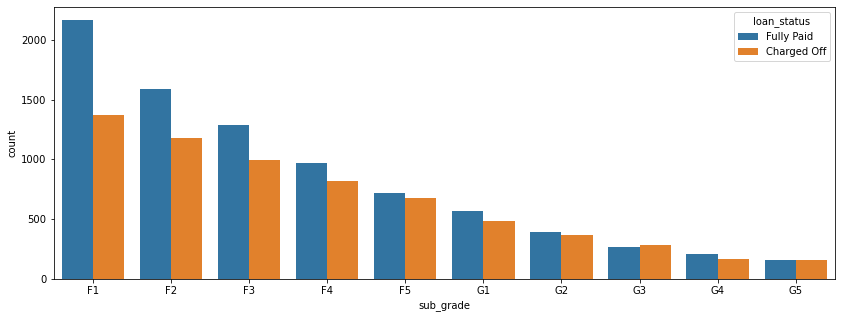

In [21]:
f_and_g=df[(df['grade']=='G') | (df['grade']=='F')]
plt.figure(figsize=(14,5))
sns.countplot(x='sub_grade',data=f_and_g,order=sorted(f_and_g['sub_grade'].unique()),hue='loan_status')


Creating a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".

In [22]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [23]:
df['loan_repaid']=df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [24]:
df[['loan_repaid','loan_status']]

loan_repaid  loan_status
0                 1   Fully Paid
1                 1   Fully Paid
2                 1   Fully Paid
3                 1   Fully Paid
4                 0  Charged Off
...             ...          ...
396025            1   Fully Paid
396026            1   Fully Paid
396027            1   Fully Paid
396028            1   Fully Paid
396029            1   Fully Paid

[396030 rows x 2 columns]

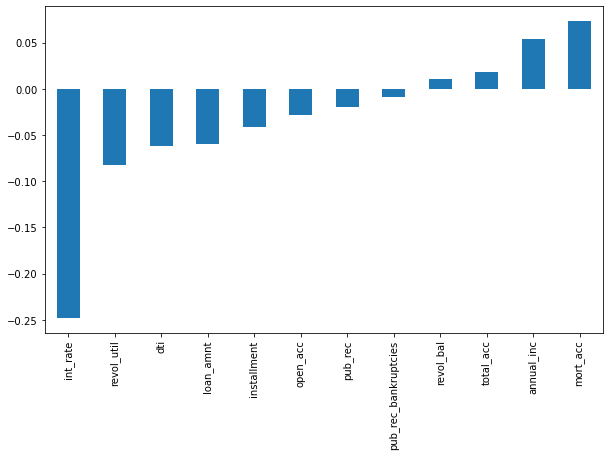

In [25]:
plt.figure(figsize=(10,6))
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

# Data Preprocessing

Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.


In [26]:
len(df)

396030

In [27]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [28]:
(df.isnull().sum()/len(df))*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [29]:
df['emp_title'].nunique()

173105

In [30]:
df=df.drop('emp_title',axis=1)

In [31]:
df['emp_length'].nunique()

11

In [32]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [33]:
emp_length_orderd=['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years'                  
 ]

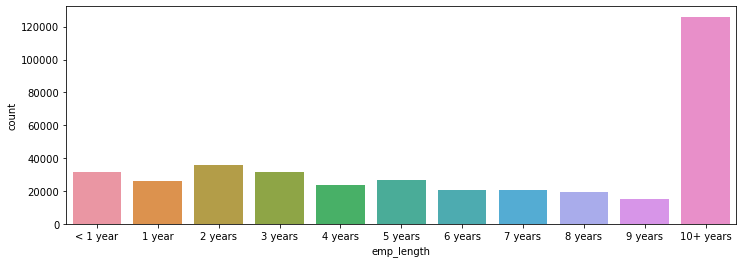

In [34]:
plt.figure(figsize=(12,4))
sns.countplot(x=df['emp_length'],data=df,order=emp_length_orderd)

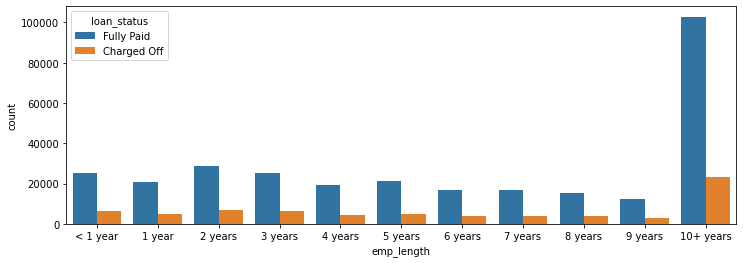

In [35]:
plt.figure(figsize=(12,4))
sns.countplot(x=df['emp_length'],data=df,order=emp_length_orderd,hue='loan_status')

In [36]:
emp_f=df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_amnt']

In [37]:
emp_c=df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_amnt']

In [38]:
emp_len=emp_c/(emp_c+emp_f)

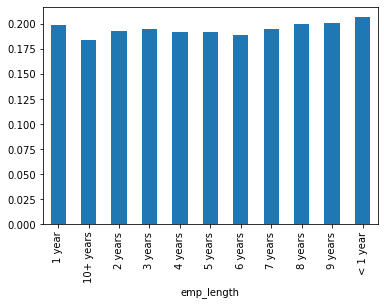

In [39]:
emp_len.plot(kind='bar')

Charge off rates are extremely similar across all employment lengths. 
Hence we will drop emp_length

In [40]:
df=df.drop('emp_length',axis=1)

In [41]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [42]:
df=df.drop('title',axis=1)

In [43]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [44]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [45]:
total_acc_mean=df.groupby('total_acc').mean()['mort_acc']

In [46]:
total_acc_mean

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [47]:
def fill_mort(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_mean[total_acc]
    else:
        return mort_acc
    

In [48]:
df['mort_acc']=df.apply(lambda x: fill_mort(x['total_acc'],x['mort_acc']),axis=1)

In [49]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [50]:
df=df.dropna()

In [51]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [52]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [53]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [54]:
df['term']=df['term'].apply(lambda x:int(x[:3]))

In [55]:
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

In [56]:
df=df.drop('grade',axis=1)

In [57]:
sub_dummies=pd.get_dummies(df['sub_grade'],drop_first=True)

df = pd.concat([df.drop('sub_grade',axis=1),sub_dummies],axis=1)

In [58]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [59]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [60]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line',
       'address'],
      dtype='object')

In [61]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [62]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [63]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [64]:
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

In [65]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [66]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [67]:
df.select_dtypes(['object']).columns

Index(['issue_d', 'loan_status', 'earliest_cr_line'], dtype='object')

In [68]:
df = df.drop('issue_d',axis=1)

In [69]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [70]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

In [71]:
df['loan_status'].value_counts()

Fully Paid     317696
Charged Off     77523
Name: loan_status, dtype: int64

# Train Test Split

In [72]:
df = df.drop('loan_status',axis=1)

In [73]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [76]:
from sklearn.preprocessing import MinMaxScaler

In [77]:
scaler = MinMaxScaler()

In [78]:
X_train = scaler.fit_transform(X_train)

In [79]:
X_test = scaler.transform(X_test)

# Creating the Model

In [80]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [81]:
model = Sequential()

model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [82]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Train on 316175 samples, validate on 79044 samples
Epoch 1/25
316175/316175 [==============================] - 7s 22us/sample - loss: 0.3003 - val_loss: 0.2645
Epoch 2/25
316175/316175 [==============================] - 4s 12us/sample - loss: 0.2650 - val_loss: 0.2636
Epoch 3/25
316175/316175 [==============================] - 4s 11us/sample - loss: 0.2627 - val_loss: 0.2628
Epoch 4/25
316175/316175 [==============================] - 4s 11us/sample - loss: 0.2615 - val_loss: 0.2621
Epoch 5/25
316175/316175 [==============================] - 4s 11us/sample - loss: 0.2609 - val_loss: 0.2617
Epoch 6/25
316175/316175 [==============================] - 4s 12us/sample - loss: 0.2603 - val_loss: 0.2624
Epoch 7/25
316175/316175 [==============================] - 4s 11us/sample - loss: 0.2601 - val_loss: 0.2616
Epoch 8/25
316175/316175 [==============================] - 4s 11us/sample - loss: 0.2595 - val_loss: 0.2611
Epoch 9/25
316175/316175 [==============================] - 4s 11us/sample - 

In [83]:
from tensorflow.keras.models import load_model

In [84]:
model.save('full_data_project_model.h5')  

# Evaluating Model Performance

In [85]:
losses = pd.DataFrame(model.history.history)

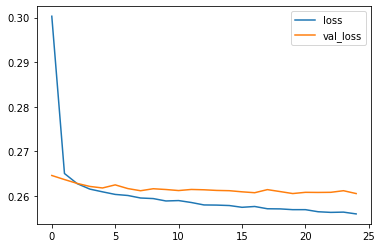

In [87]:
losses.plot()

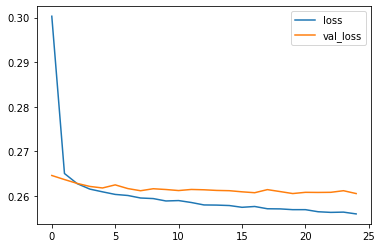

In [88]:
losses[['loss','val_loss']].plot()

In [89]:
from sklearn.metrics import classification_report,confusion_matrix

In [90]:
predictions = model.predict_classes(X_test)

In [92]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [93]:
confusion_matrix(y_test,predictions)

array([[ 6910,  8748],
       [  151, 63235]], dtype=int64)

In [94]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [95]:
model.predict_classes(new_customer.values.reshape(1,78))

array([[1]])

In [96]:
df.iloc[random_ind]['loan_repaid']

1.0